# MIS 307 Project Phase 4 Final Report

Group code: PG1 <br>
Group members: Kairavi Dave, Ava Feeney, Jackie Castro, Veronica Kharunda

![convert notebook to web app](https://post.healthline.com/wp-content/uploads/2020/08/coffee-worlds-biggest-source-of-antioxidants-1296x728-feature_0-732x549.jpg)

## 1. Project Description

A small coffee shop in Seattle needs an updated system for their register to to document their orders. 

The manager needs to be able to see the contents of the order, such as the type of drink; a latte, americano, or brewed coffee. If the drink is a latte, it can __have one kind of milk: skim, almond, 2%, and whole.__ If the drink is an americano or brewed coffee, it can __have one kind of roast: blond roast, columbian roast, or a pike place
roast.__ The different types of __milk change the price, but not the roast.__

There are also three sizes: small, medium, and large. __These also affect the price.__

The manager wants to be able to __look up past orders.__ She can look up orders based on the __order number,__ as well as look at the orders in a spreadsheet type data storage system to look at the __most popular types of milk, roast, and sizes of coffee.__  However, it is not limited to just that: we can also look up the total revenue, orders by order number, and the biggest orders. The manager will also be able to view graphs of the data for quick viewing. This way, she can determine which supplies to order more of __(supply and demand).__





## 2. Implementation

### Excel/Sheets data input

The orders were created in an Excel spreadsheet with columns signifying their __order number, type of drink, size, milk, roast, and price.__ We used ‘real life’ data by having similar prices to coffee shops for our items. We then converted it to a CSV file to use in our code. 

### Writing a SQL table from the CSV dataframe

Code was written to create a dataframe from the CSV file and use it to write our SQL file. 


### Price Checker Function

Inputting prices manually was a pain, so we decided to create a function that would comb through our database and calculate the prices itself as a “double checker.” <br> 

Here is what affected the price: <br>

__Base price:__ 2 dollars <br>
__Size:__ Small = .5, Medium = 1, Large = 1.5 <br>
__Drink Type:__ Latte: 1.5, Brewed Coffee, 1, Americano, .5 <br>
__Milk:__ Whole = 1.5, Almond = 1, Skim = .5 <br> 
__Note:__ Americano and brewed do not have milk, only lattes do. <br>

__Example:__ A small latte with whole milk would be 5 dollars. 


### User Interface

The user can input letters to look up the most popular type of milk, roast, coffee type, and size. <br>
They can also look up orders based on order numbers, as well as viewing total revenue and largest orders by number of drinks.

Our interface will print the results as a dataframe.

### 2.1 You can add multiple subsections as you need



### 2.2 Preparing data

Make sure to lable each cell at the beginning of the cell.

In [91]:
# Cell #1
import pandas as pd 
orders_df = pd.read_csv('Coffee_Orders.csv')
orders_df.head()

,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10001,Latte,Small,Whole,None,5.0
1,10001,Americano,Medium,None,Blonde,3.5
2,10002,Brewed,Medium,None,Pike,4.0
3,10003,Brewed,Large,None,Pike,4.5
4,10004,Americano,Small,None,Columbian,3.0


You can add descriptions between cells.

In [92]:
# Cell #2
with open('Coffee_Orders.sql', mode='w') as cof:
    cof.write('DROP TABLE IF EXISTS Orders;\n')
    cof.write('CREATE TABLE Orders (OrderNumber INT, CoffeeType TEXT, Size TEXT, Milk TEXT, Roast TEXT, Price Decimmal(1,1));\n')
    cof.write('INSERT INTO Orders (OrderNumber,CoffeeType,Size,Milk,Roast,Price) VALUES\n')
    for i in range(orders_df.shape[0]):
        cof.write('('+str(orders_df.iloc[i]['OrderNumber'])+',')
        cof.write('\''+str(orders_df.iloc[i]['CoffeeType'])+'\',')
        cof.write('\''+str(orders_df.iloc[i]['Size'])+'\',')
        cof.write('\''+str(orders_df.iloc[i]['Milk'])+'\',')
        cof.write('\''+str(orders_df.iloc[i]['Roast'])+'\',')
        cof.write(str(orders_df.iloc[i]['Price'])+')')
        if i < orders_df.shape[0]-1:
            cof.write(',\n')
        else:
            cof.write(';\n')

In [93]:
# Cell #3
import sqlite3
!sqlite3 Coffee_Orders.db < ./Coffee_Orders.sql
connection = sqlite3.connect('Coffee_Orders.db')
# Checking the conncetion
pd.read_sql('SELECT * FROM Orders', connection).head(10)

,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10001,Latte,Small,Whole,None,5.0
1,10001,Americano,Medium,None,Blonde,3.5
2,10002,Brewed,Medium,None,Pike,4.0
3,10003,Brewed,Large,None,Pike,4.5
4,10004,Americano,Small,None,Columbian,3.0
5,10005,Latte,Large,Almond,None,6.0
6,10006,Latte,Large,Skim,None,5.5
7,10007,Americano,Small,None,Blonde,4.0
8,10008,Brewed,Medium,None,Pike,4.0
9,10009,Brewed,Small,None,Columbian,3.5


### 2.3 User menu
Make sure to display (run) all functions you have. In other words, the ipynb and html files should display all functionalities of your project.

## Price Calculator Function

In [94]:
# Cell #8
#clearing prices for double checking

orders_df['Price'] = 0
orders_df.head(5)

,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10001,Latte,Small,Whole,None,0
1,10001,Americano,Medium,None,Blonde,0
2,10002,Brewed,Medium,None,Pike,0
3,10003,Brewed,Large,None,Pike,0
4,10004,Americano,Small,None,Columbian,0


In [95]:
# Cell #9

#price update function based on coffee type: Latte, Americano, or Brewed

#function

def coffee_type_price(coffee):
    price = 2.5
    if coffee == "Latte":
        price += 1.5
    elif coffee == "Americano":
        price += 1
    else:
        pass
    return price

#lambda application
orders_df['Price'] = list(map(lambda x: coffee_type_price(x), orders_df['CoffeeType']))
orders_df.head(10)

#lamda application

,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10001,Latte,Small,Whole,None,4.0
1,10001,Americano,Medium,None,Blonde,3.5
2,10002,Brewed,Medium,None,Pike,2.5
3,10003,Brewed,Large,None,Pike,2.5
4,10004,Americano,Small,None,Columbian,3.5
5,10005,Latte,Large,Almond,None,4.0
6,10006,Latte,Large,Skim,None,4.0
7,10007,Americano,Small,None,Blonde,3.5
8,10008,Brewed,Medium,None,Pike,2.5
9,10009,Brewed,Small,None,Columbian,2.5


In [96]:
# Cell #10

#price update function based on milk

#function

def milk_price(milk, price):
    if milk == "Almond":
        price += 1.5
    elif milk == "Whole":
        price += 1
    elif milk == "Skim":
        price += .5
    else:
        pass
    return price


#lambda application
orders_df['Price'] = list(map(lambda x,y: milk_price(x,y), orders_df['Milk'], orders_df['Price']))

orders_df.head(10)

,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10001,Latte,Small,Whole,None,5.0
1,10001,Americano,Medium,None,Blonde,3.5
2,10002,Brewed,Medium,None,Pike,2.5
3,10003,Brewed,Large,None,Pike,2.5
4,10004,Americano,Small,None,Columbian,3.5
5,10005,Latte,Large,Almond,None,5.5
6,10006,Latte,Large,Skim,None,4.5
7,10007,Americano,Small,None,Blonde,3.5
8,10008,Brewed,Medium,None,Pike,2.5
9,10009,Brewed,Small,None,Columbian,2.5


In [97]:
# Cell #11

#price update function based on size

#function

def size_price(size, price):
    if size == "Large":
        price += 1.5
    elif size == "Medium":
        price += 1
    else:
        price += .5
    return price




#lambda application
orders_df['Price'] = list(map(lambda x,y: size_price(x,y), orders_df['Size'], orders_df['Price']))

orders_df.head(10)


,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10001,Latte,Small,Whole,None,5.5
1,10001,Americano,Medium,None,Blonde,4.5
2,10002,Brewed,Medium,None,Pike,3.5
3,10003,Brewed,Large,None,Pike,4.0
4,10004,Americano,Small,None,Columbian,4.0
5,10005,Latte,Large,Almond,None,7.0
6,10006,Latte,Large,Skim,None,6.0
7,10007,Americano,Small,None,Blonde,4.0
8,10008,Brewed,Medium,None,Pike,3.5
9,10009,Brewed,Small,None,Columbian,3.0


## Above is the final prices calculated. 

## User Interface

In [101]:
# Cell #4
print('############################')
print('#     Coffee Orders DB     #')
print('############################')
continueProg = True
while continueProg == True:
    print('\n')
    print('[Q] Quit')
    print('[M] Print the most popular milk type')
    print('[R] Print the most popular roast')
    print('[D] Print the most popular drink')
    print('[P] Print the most popular size')
    print('[O] Print the order of order number given')
    print('[S] Print the total sales revenue')
    print('[G] Print the largest order')
    print('-'*35)
    choice = input('Select menu: ')
    print('-'*35)

    if choice == 'Q': 
        continueProg = False
        
    elif choice == 'M':
        # highest FREQ of milk types
        pop_milk = pd.read_sql('SELECT Milk FROM Orders WHERE NOT Milk = "None" GROUP BY Milk ORDER BY COUNT(*) DESC LIMIT 1;', connection)
        print('Your most popular milk type is: ')
        display(pop_milk)
        print('-'*35)
        
    elif choice == 'R':
        # highest FREQ of roasts
        pop_roast = pd.read_sql('SELECT Roast FROM Orders WHERE NOT Roast = "None" GROUP BY Roast ORDER BY COUNT(*) DESC LIMIT 1;', connection)
        print('Your most popular roast type is: ')
        display(pop_roast)
        print('-'*35)
        
    elif choice == 'D':
        # highest FREQ of drink types
        pop_drink_type = pd.read_sql('SELECT CoffeeType FROM Orders GROUP BY CoffeeType ORDER BY COUNT(*) DESC LIMIT 1;', connection)
        print('Your most popular coffee type is: ')
        display(pop_drink_type)
        print('-'*35)
        
    elif choice == 'P':
        # highest FREQ of sizes
        pop_size = pd.read_sql('SELECT Size FROM Orders GROUP BY Size ORDER BY COUNT(*) DESC LIMIT 1;', connection)
        print('Your most popular size is: ')
        display(pop_size)
        print('-'*35)
        
    elif choice == 'O':
        # selecting by order number
        order_number = input('Enter order number (five digit code): ')
        order_number_display = pd.read_sql('SELECT * FROM Orders WHERE OrderNumber = ' + order_number + ';', connection)
        print('Order Number:', order_number)
        display(order_number_display)
        print('-'*35)
        
    elif choice == 'S':
        # displaying totals
        totals = pd.read_sql('SELECT SUM(Price) AS "Total Revenue" FROM Orders;', connection)
        print('Your Total Revenue Is:')
        display(totals)
        print('-'*35)
        
    elif choice == 'G':
        # largest order
        largest_order = pd.read_sql('SELECT OrderNumber FROM Orders GROUP BY OrderNumber ORDER BY COUNT(*) DESC LIMIT 1;', connection)
        print('Order Number of Largest Order:')
        display(largest_order)
        print('-'*35)
        
    else:
        print('Invalid letter. :( Try again')
        print('-'*35)
        
        

############################
#     Coffee Orders DB     #
############################


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: M
-----------------------------------
Your most popular milk type is: 


,Milk
0,Almond


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: R
-----------------------------------
Your most popular roast type is: 


,Roast
0,Pike


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: D
-----------------------------------
Your most popular coffee type is: 


,CoffeeType
0,Latte


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: P
-----------------------------------
Your most popular size is: 


,Size
0,Medium


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: O
-----------------------------------
Enter order number (five digit code): 10003
Order Number: 10003


,OrderNumber,CoffeeType,Size,Milk,Roast,Price
0,10003,Brewed,Large,None,Pike,4.5


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: S
-----------------------------------
Your Total Revenue Is:


,Total Revenue
0,144.0


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: G
-----------------------------------
Order Number of Largest Order:


,OrderNumber
0,10001


-----------------------------------


[Q] Quit
[M] Print the most popular milk type
[R] Print the most popular roast
[D] Print the most popular drink
[P] Print the most popular size
[O] Print the order of order number given
[S] Print the total sales revenue
[G] Print the largest order
-----------------------------------
Select menu: Q
-----------------------------------


## Graphs

Text(0.5, 0, 'Milk Type')

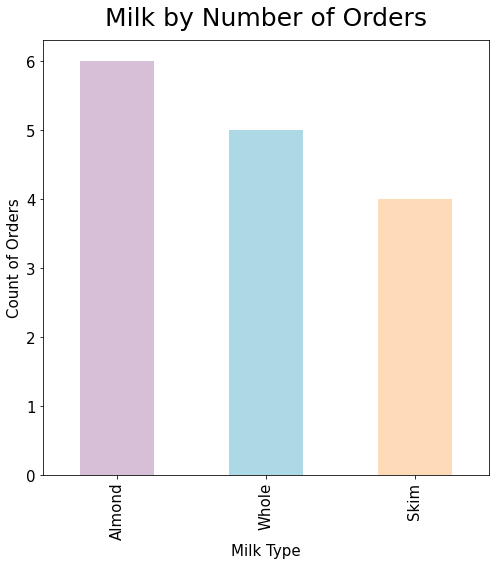

In [103]:
# Cell #5

import numpy as np
import matplotlib.pyplot as plt

coffee_chart = pd.read_sql('SELECT * FROM Orders WHERE NOT Milk = "None"', connection)


coffee_chart['Milk'].value_counts().plot(kind='bar', figsize = (8,8), fontsize = 15, color=['thistle', 'lightblue', 'peachpuff'])
plt.title('Milk by Number of Orders', y = 1.02, fontsize = 25)

plt.ylabel("Count of Orders", fontsize = 15)
plt.xlabel("Milk Type", fontsize = 15)




Text(0.5, 0, 'Roast Type')

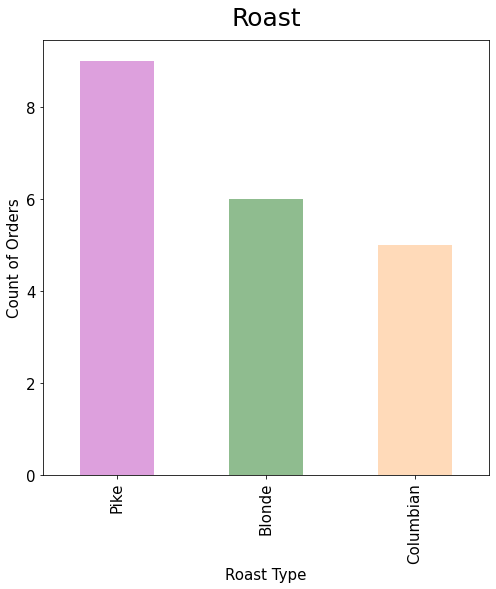

In [104]:
# Cell #6 
coffee_chart = pd.read_sql('SELECT * FROM Orders WHERE NOT Roast = "None"', connection)
coffee_chart['Roast'].value_counts().plot(kind='bar', figsize = (8,8), fontsize = 15, color=['plum', 'darkseagreen', 'peachpuff'])
plt.title('Roast', fontsize = 25, y = 1.02)

plt.ylabel("Count of Orders", fontsize = 15)
plt.xlabel("Roast Type", fontsize = 15)

Text(0.5, 0, 'Coffee Type')

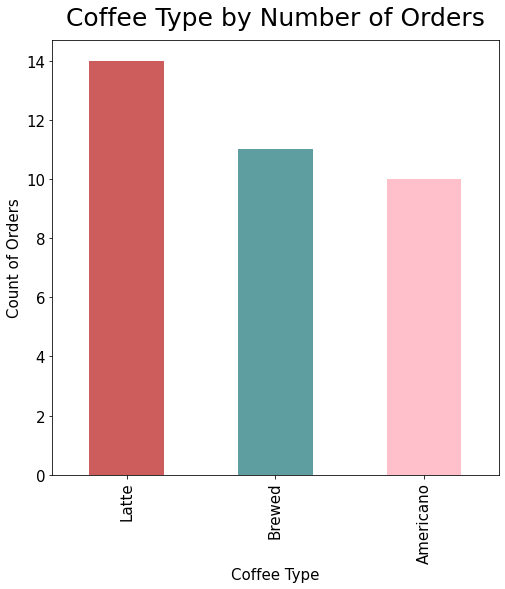

In [105]:
# Cell #7
coffee_chart = pd.read_sql('SELECT * FROM Orders', connection)
coffee_chart['CoffeeType'].value_counts().plot(kind='bar', figsize = (8,8), fontsize = 15, color=['indianred', 'cadetblue', 'pink'])
plt.title('Coffee Type by Number of Orders', fontsize = 25, y = 1.02)

plt.ylabel("Count of Orders", fontsize = 15)
plt.xlabel("Coffee Type", fontsize = 15)


## 3. Table of Components

Display a table summarizing the functionality (required components) and the location in the notebook file. Each cell should clearly indicate the cell number.

In [106]:
import pandas as pd
comp = pd.read_csv('component.csv')
comp

,Functionality,Location (Cell#)
0,Read/Write CSV,#1
1,User Interaction,"#4, #8, #9, #10, #11"
2,SQL table creation,"#2, #3"
3,Plot generation,"#5, #6, #7"


## 4. Implementation Result

We successfully created a database by connecting the CSV file. __This was the foundation for our SQL file and everything that came after.__ 

A "price calculator" function was created to ensure the prices were correct from our pricing model. __This makes it easier for the users as they don't have to calculate prices manually, saving time.__

Users could efficiently utilize our user interface to filter the data by varying methods such as most popular types and totals. With the use of data from the csv file, which organizes orders by category and gives each one a distinct order number, we were able to effectively find their order and display their ordered drink. __This made it easier to access desired data.__

We were also able to generate bar graphs showing the most ordered "Milk by Number of Orders", for example. Furthermore, we can also display the most ordered "Roast" type such as Pike, Blonde and Columbian. __This made visuals for data that would take ages to determine manually just from looking at the database.__

## 5. Discussion

__Improvements:__ <br>
- a way to not manually input data into an excel spreadsheet, creating a user interface way to input orders.
- displaying the biggest order not by its order number, but displaying all the rows grouped by order number


__Goals Achieved:__ <br>
- All user interface options we wanted were added.
- We were able to successfully create graphs as well as modify the colors, formatting of text and size of graph for easy reading. 
- We were able to create a function that checks the price of the orders by reading off the rows and following our pricing model.
- Adding labels for the X and Y axises in the graphs. 
